In [1]:
# Só deve descomentar 1 opção
#origemImagens = 'originais'
origemImagens = 'originaisLimpas'

In [2]:
dicionarioNomesArquivos = {
    'originais': ('dataset.csv', 'labels.csv'),
    'originaisLimpas': ('datasetLimpo.csv', 'labelsLimpo.csv'),
}
dicionarioPastaArquivos = {
    'originais': 'ImagensMultiprova',
    'originaisLimpas': 'ImagensLimpasMultiprova',
}

In [3]:
(nomeArquivoDataset, nomeArquivoLabels) = dicionarioNomesArquivos[origemImagens]

In [4]:
carregarDatasetAnterior = False

In [5]:
basePathData = '/content/drive/MyDrive/2021.2/TCC/Testes/Data/'
path = basePathData + dicionarioPastaArquivos[origemImagens] + '/'

In [6]:
from os import listdir
from os.path import isfile, join, exists
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
def getImageAndResize(pathImage, shapeImage = (32, 32, 3)):
  (sizeX, sizeY, channels) = shapeImage
  baseImg = cv2.imread(pathImage, cv2.IMREAD_COLOR)
  resizedBaseImage = cv2.resize(baseImg, (sizeX, sizeY))
  flattenBaseImage = resizedBaseImage.flatten()
  maxColorInImage = max(flattenBaseImage)
  baseImgNormalized = flattenBaseImage / maxColorInImage
  return baseImgNormalized.astype('float32')

In [9]:
def createDatasetForImages(directoryPath, imageLabel, shapeImage = (32, 32, 3)):
  (sizeX, sizeY, channels) = shapeImage
  images = [f for f in listdir(directoryPath) if isfile(join(directoryPath, f))]
  dataframe = pd.DataFrame(index=list(range(0, len(images))), columns = list(range(1, sizeX * sizeY * channels + 1)))
  labels = pd.DataFrame([imageLabel] * len(images))
  for index in range(0, len(images)):
    pathToImg = directoryPath + images[index]
    image = getImageAndResize(pathToImg, shapeImage)
    dataframe.loc[index] = image
  return (labels, dataframe)

In [112]:
tipoImagem = 'V'
pathTipoImagem = path + tipoImagem + '/'

In [113]:
# Constroi paths para a exportação do dataset
pastasDataset = 'DatasetMultiprovaAvulso/' #Pode receber 'DatasetMultiprova/' (Caso 1) ou 'DatasetMultiprovaAvulso/' (Caso 2)
tipoDataset = tipoImagem + '/' #Pode receber 'Numeros/', 'LetrasAJ/' ou 'LetrasVF/' (Caso 1) ou a classe que corresponde (ex.: '{tipoImagem}/') (Caso 2)
basePathFolderOriginal = basePathData + pastasDataset + tipoDataset
datasetOriginalPath = basePathFolderOriginal + nomeArquivoDataset
labelsOriginalPath = basePathFolderOriginal + nomeArquivoLabels

In [114]:
dataframes = []
labels = []

In [115]:
if carregarDatasetAnterior:
  if exists(datasetOriginalPath):
    dataframes.append(pd.read_csv(datasetOriginalPath).astype('float32'))
    labels.append(pd.read_csv(labelsOriginalPath, squeeze=True).astype('string'))
  else:
    print('Dataset original nao existe no path:', datasetOriginalPath)

In [116]:
(label, dataframe) = createDatasetForImages(pathTipoImagem, tipoImagem)

In [117]:
dataframe.shape

(2036, 3072)

In [118]:
dataframes.append(dataframe)
labels.append(label)

In [119]:
dataframeFinal = pd.concat(dataframes)
labelsFinal = pd.concat(labels)

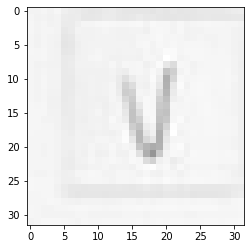

Index: 1223 , Label: V


In [120]:
# Checar se imagem foi copiada corretamente
indexImg = random.randint(0, len(labelsFinal))
image = np.array(dataframeFinal.iloc[indexImg]).reshape(32, 32, 3).astype('float32')
plt.imshow(image, cmap="gray")
plt.show()
print('Index:', indexImg, ', Label:', labelsFinal.iloc[indexImg][0])

In [121]:
# Salvar dataframe e labels lidos
pathToExportDF = datasetOriginalPath
pathToExportLabels = labelsOriginalPath
dataframeFinal.to_csv(path_or_buf=pathToExportDF, index=False)
labelsFinal.to_csv(path_or_buf=pathToExportLabels, index=False)